(<Axes: >, <matplotlib.image.AxesImage at 0x7f38540ad3d0>)

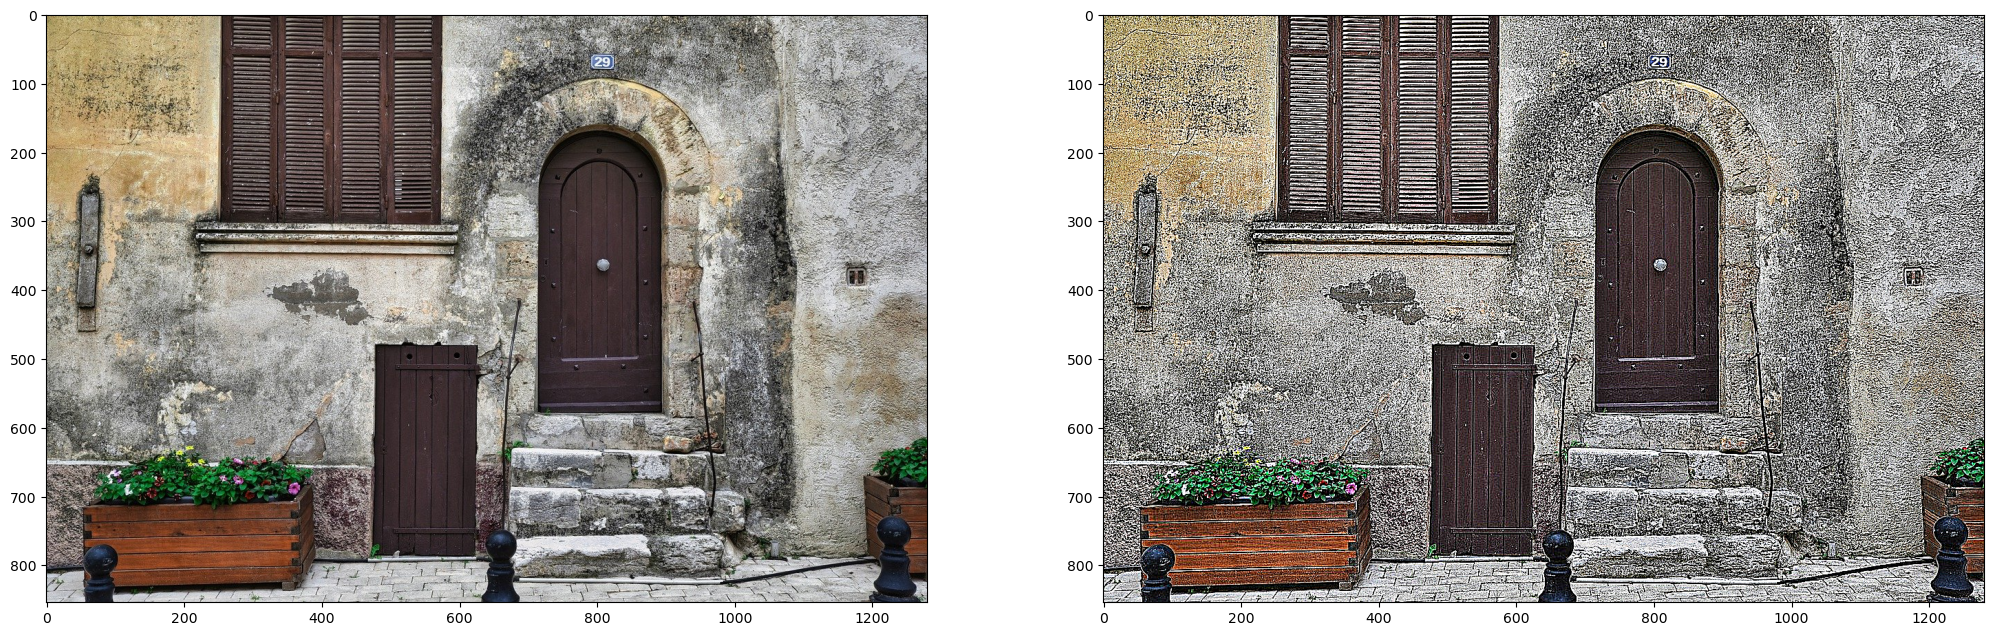

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [25, 20]
img = cv2.imread('door.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_float = img.astype(np.float32) / 255.0
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img_float, ksize=(5,5), sigmaX=5)



# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img_float - unsharp

# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 1.5

sharpened = img_float + diff*amount

sharpened = np.clip(sharpened, 0, 1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)

# Questions
* What is a good (reasonable) value for the amount parameter? - Resonable value for amount is from 0.5 to 2
* What happens if it is too small? - Result will be closer to the original image .
* What happens if it is too large? - If amount too large image will be too saturated and looks unnatural (I would say noisy).